In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

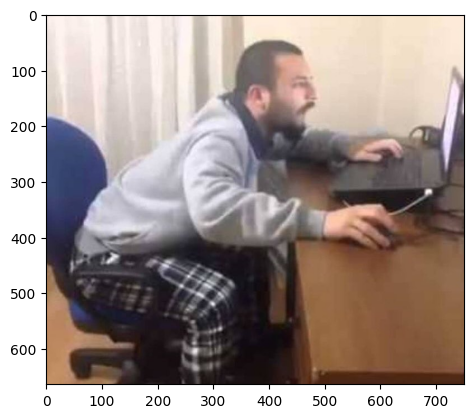

In [4]:
full = cv2.imread('aykut full.jpg')
full = cv2.cvtColor(full,cv2.COLOR_BGR2RGB)

face = cv2.imread('aykut kafa.jpg')
face = cv2.cvtColor(face,cv2.COLOR_BGR2RGB)

plt.imshow(full)

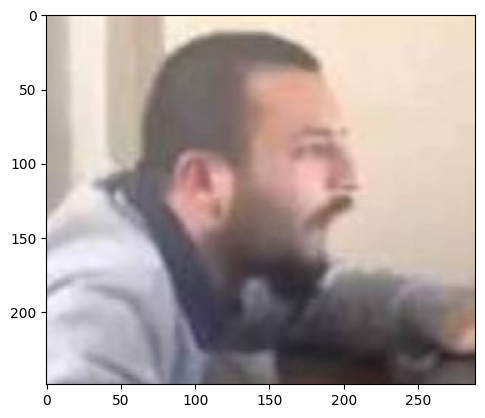

In [5]:
plt.imshow(face)

In [6]:
#myfunc=eval('sum') fonksiyonu belirtilen ifadeyi değerlendirir, eğer ifade geçerli bir Python ifadesiyse yürütülür.
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED','cv2.TM_CCORR','cv2.TM_CCORR_NORMED','cv2.TM_SQDIFF','cv2.TM_SQDIFF_NORMED']


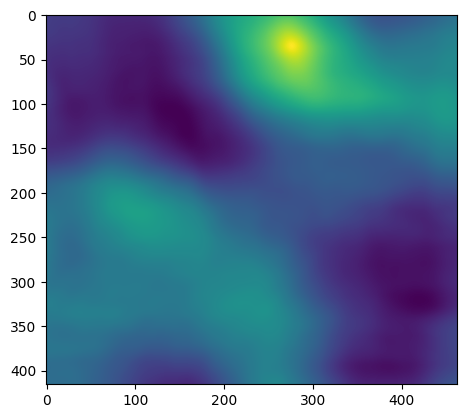

In [7]:
deneme_metodu= eval('cv2.TM_CCOEFF')
res = cv2.matchTemplate(full,face,deneme_metodu)
plt.imshow(res) # ısı haritası çiziyor max bulduğunu düşündüğü yerde, en sonuncular hariç onlar min buluyor. 

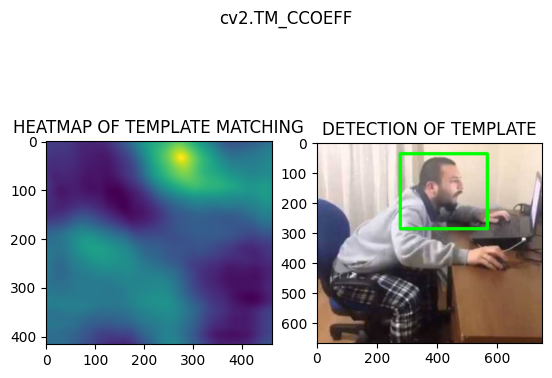

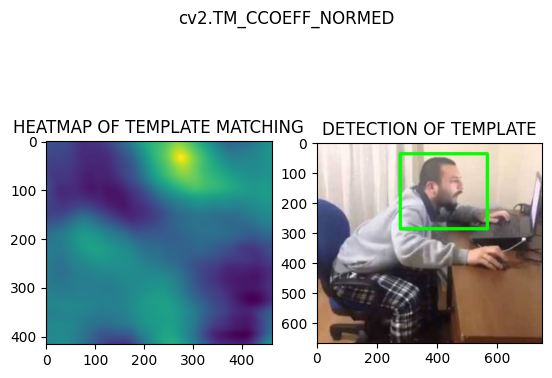

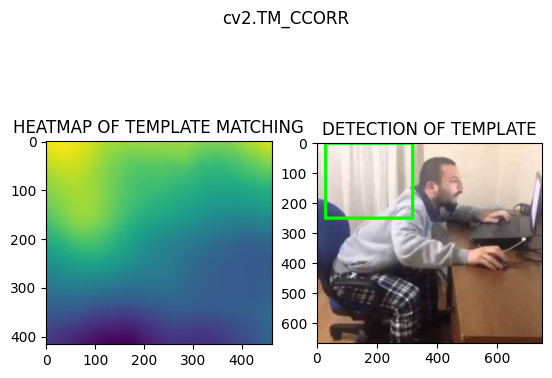

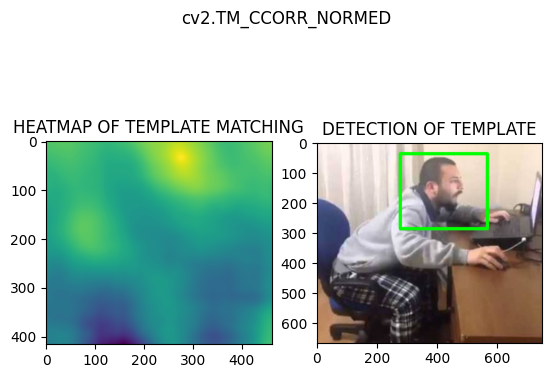

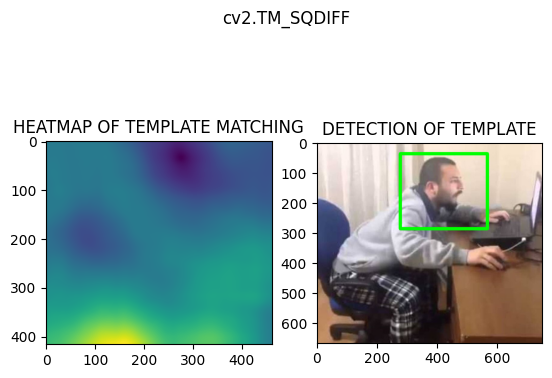

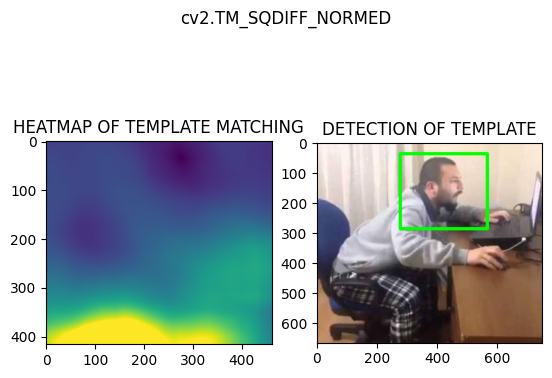

In [11]:
for m in methods:

    # create a copy
    full_copy = full.copy()
    method = eval(m)

    # template matching
    result= cv2.matchTemplate(full_copy,face,method) 

    min_val,max_val,min_loc,max_loc = cv2.minMaxLoc(result) # ısı haritasını kullanarak dikdörtgen çizeceğiz.

    if method in [cv2.TM_SQDIFF,cv2.TM_SQDIFF_NORMED]: # bu 2 method min algılıyor diye
        top_left = min_loc
    else:
        top_left = max_loc    

    height,width,channels = face.shape

    bottom_right= (top_left[0]+width, top_left[1]+height) #dikdörtgen boyutu komple ekleniyor

    cv2.rectangle(full_copy,top_left,bottom_right,(0,255,0),10)


    #plot and show images

    plt.subplot(121)
    plt.imshow(result)
    plt.title('HEATMAP OF TEMPLATE MATCHING')
    plt.subplot(122)
    plt.imshow(full_copy)
    plt.title('DETECTION OF TEMPLATE')
    #ana başlık method ismi 
    plt.suptitle(m)

    plt.show() # üst üste gelmesin diye 

    print('\n')
    print('\n')


